### COVID-19 
### UPDATE by DAY in the countries: CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA
#### (Start recorded day: 22.01.2020)

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

Start importing files in folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', '03-10-2020.csv', '03-11-2020.csv', '03-12-2020.csv', '03-13-2020.csv', '03-14-2020.csv',

### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


234

### Number of the infected countries in the first outbreak day

In [3]:
infected_countries_earliest, num_infected_countries[0]

(array(['Japan', 'Macau', 'Mainland China', 'South Korea', 'Taiwan',
        'Thailand', 'US'], dtype=object),
 7)

### Number of the infected countries in the latest outbreak day

In [4]:
infected_countries_latest, num_infected_countries[-1]

(array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Grenada', 'Gu

### Number of the infected countries changed by day

('Increasing', 0)

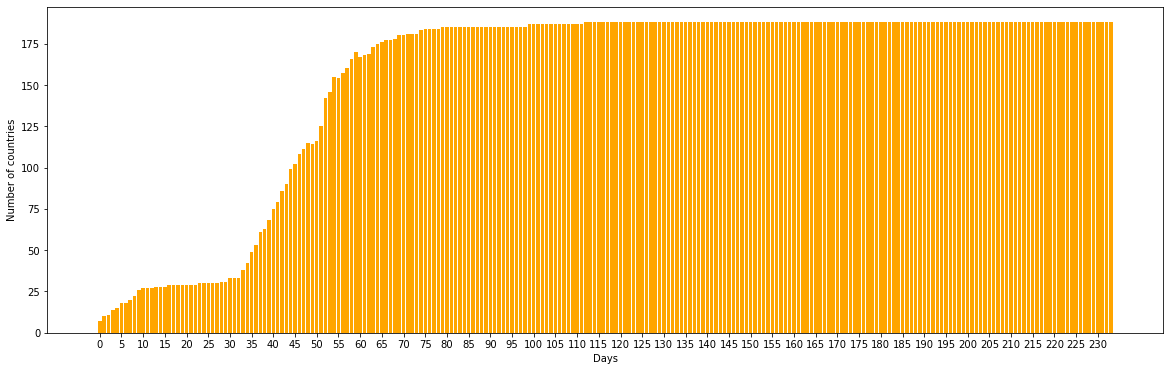

In [5]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, num_infected_countries, color='orange')
plt.xlabel('Days')
plt.ylabel('Number of countries')
('Increasing', num_infected_countries[-1]-num_infected_countries[-2])

Text(0, 0.5, 'Number of countries in log_values')

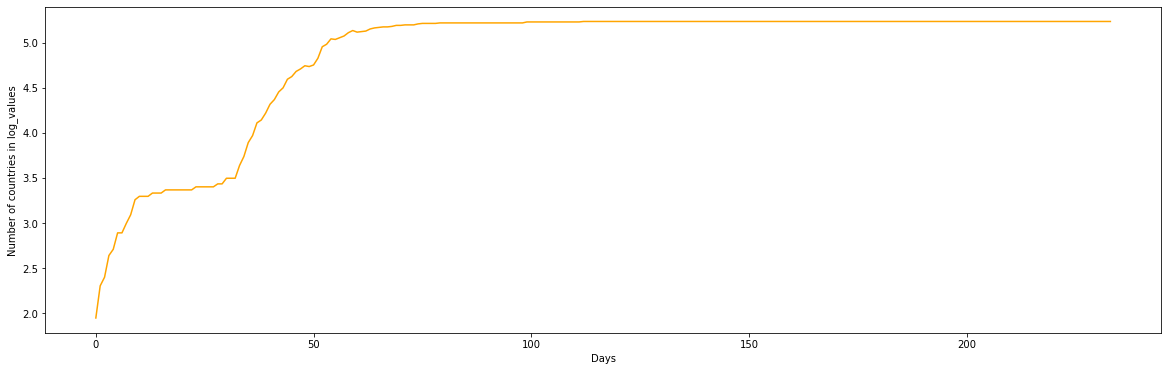

In [6]:
plt.plot(x_dat, np.log(num_infected_countries), color='orange', label="New Cases by day in log_values")
plt.xlabel('Days')
plt.ylabel('Number of countries in log_values')

### New cases in the World changed by day

Last day Increasing 319528


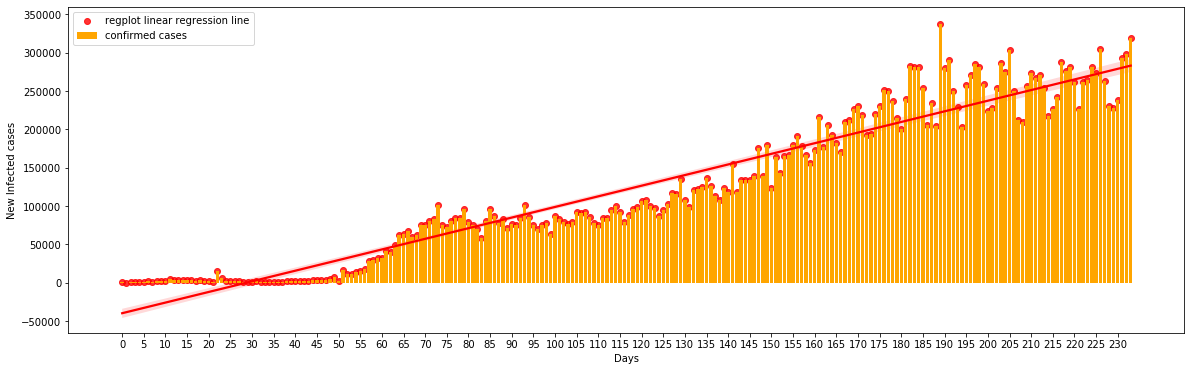

In [7]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, newCasesByDay, color='orange', label='confirmed cases')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.legend()
print('Last day Increasing', totalconfirmed_by_day[-1]-totalconfirmed_by_day[-2])
ax = sns.regplot(x=x_dat, y=newCasesByDay, ci=95, label="regplot linear regression line", color='red')
ax.legend(loc="best")

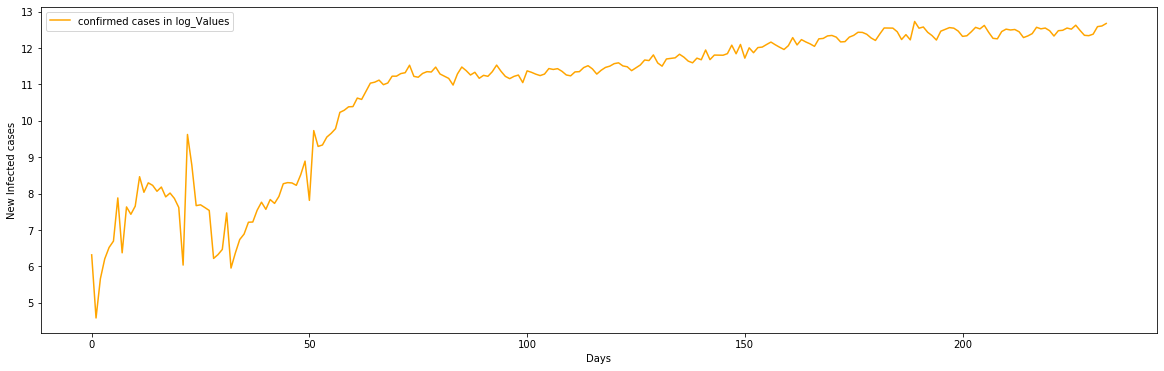

In [8]:
plt.plot(x_dat, np.log(newCasesByDay), color='orange', label='confirmed cases in log_Values')
plt.xlabel('Days')
plt.ylabel('New Infected cases')
plt.legend()

### Total CONFIRMED_vs_RECOVERED_vs_FATALITIES cases in the World changed by day

(('Total Confirmed', 28481413),
 ('Total Recovered', 19215800),
 ('Total Fatalities', 915356),
 ('Remaining', 8350257))

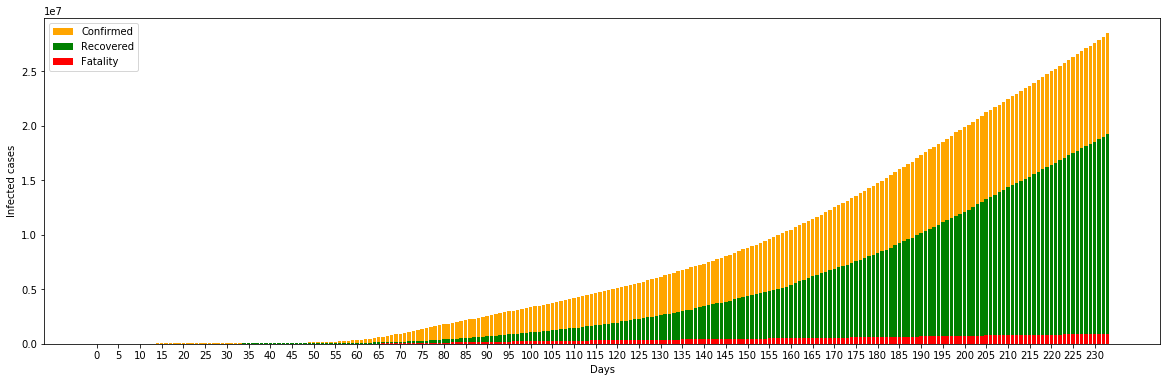

In [9]:
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, totalconfirmed_by_day, color='orange', label='Confirmed')
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Recovered')
plt.bar(x_dat, totalfatalities_by_day, color='red', label='Fatality')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend()
('Total Confirmed', totalconfirmed_by_day[-1]), ('Total Recovered', totalrecovered_by_day[-1]), ('Total Fatalities', totalfatalities_by_day[-1]), ('Remaining', totalconfirmed_by_day[-1]-totalrecovered_by_day[-1]-totalfatalities_by_day[-1])

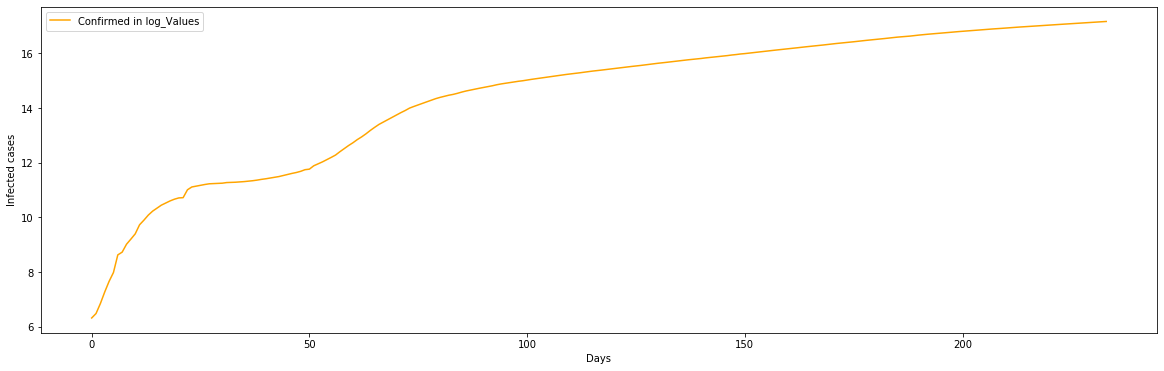

In [10]:
plt.plot(x_dat, np.log(totalconfirmed_by_day), color='orange', label='Confirmed in log_Values')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend()

### Number of infected cases changed by day in the countries
### China, Germany, Italy, South Korea, Japan, US, Australia

NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: 

China:  31
Germany:  0
Italy:  0
Korea:  1
Japan:  1
USA:  1
Australia:  0
Vietnam:  0


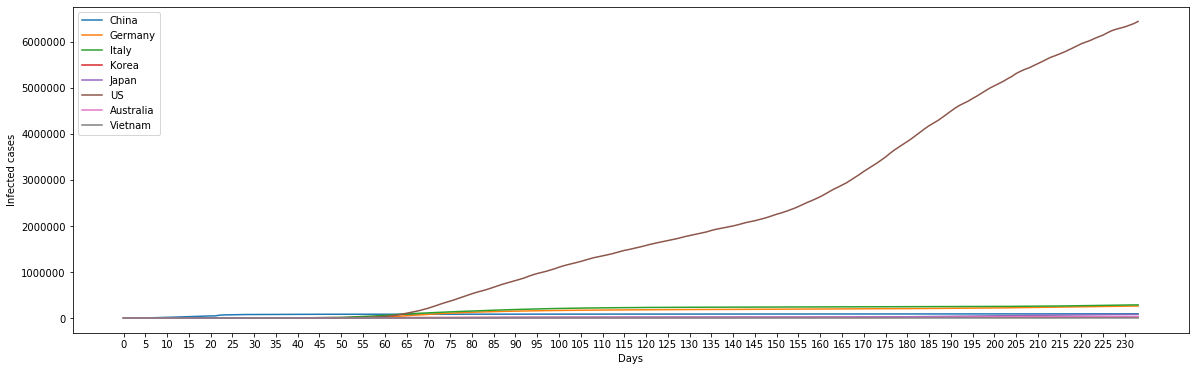

In [34]:
# y_dat = [y_dat_cn, y_dat_de, y_dat_it, y_dat_kr, y_dat_jp, y_dat_us, y_dat_au]
y_dat = [y_dat_confirmed['China'], y_dat_confirmed['Germany'], y_dat_confirmed['Italy'], y_dat_confirmed['Korea, South'], 
         y_dat_confirmed['Japan'], y_dat_confirmed['US'], y_dat_confirmed['Australia'], y_dat_confirmed['Vietnam']]

for y in y_dat:
    plt.plot(x_dat, y)

plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend(["China", "Germany", "Italy", "Korea", "Japan", "US", "Australia", "Vietnam"])

print("NUMBER OF INFECTED CASES IN THE FIRST DAY in the following countries: \n")
print("China: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='China').shape[0])
print("Germany: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Germany').shape[0])
print("Italy: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Italy').shape[0])
print("Korea: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Korea').shape[0])
print("Japan: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Japan').shape[0])
print("USA: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='US').shape[0])
print("Australia: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Australia').shape[0])
print("Vietnam: ", StartML.searchByValue(data[0], try_keys=['Country_Region', 'Country/Region'], value='Vietnam').shape[0])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in China

(('Last day Increasing', 18),
 ('Confirmed', 90145),
 ('Recovered', 85025),
 ('Fatalities', 4733),
 ('Remaining', 387))

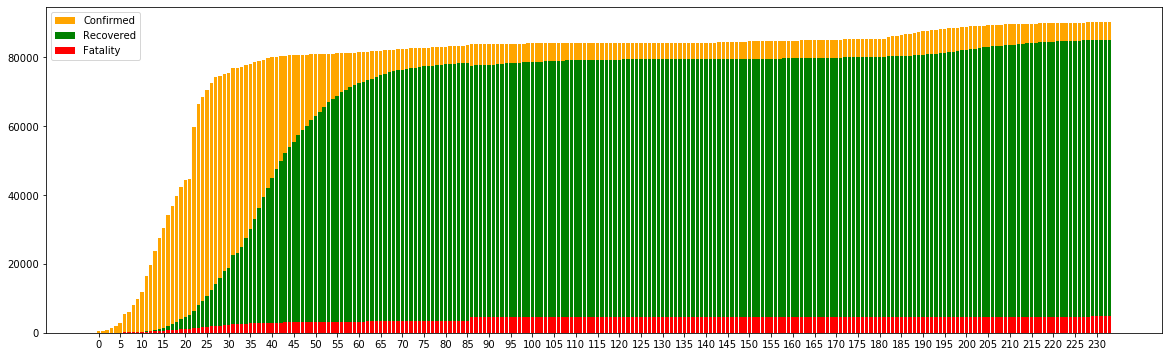

In [30]:
country = 'China'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Germany

(('Last day Increasing', 1586),
 ('Confirmed', 259735),
 ('Recovered', 231349),
 ('Fatalities', 9348),
 ('Remaining', 19038))

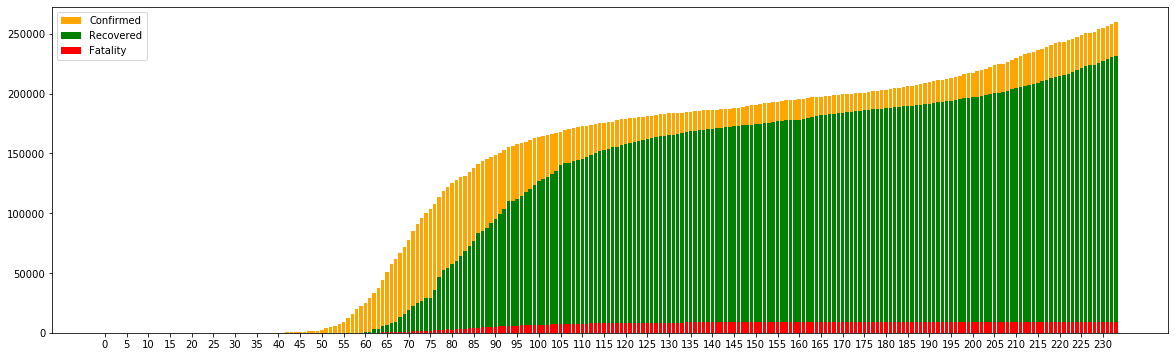

In [28]:
country = 'Germany'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Italy

(('Last day Increasing', 1616),
 ('Confirmed', 284796),
 ('Recovered', 212432),
 ('Fatalities', 35597),
 ('Remaining', 36767))

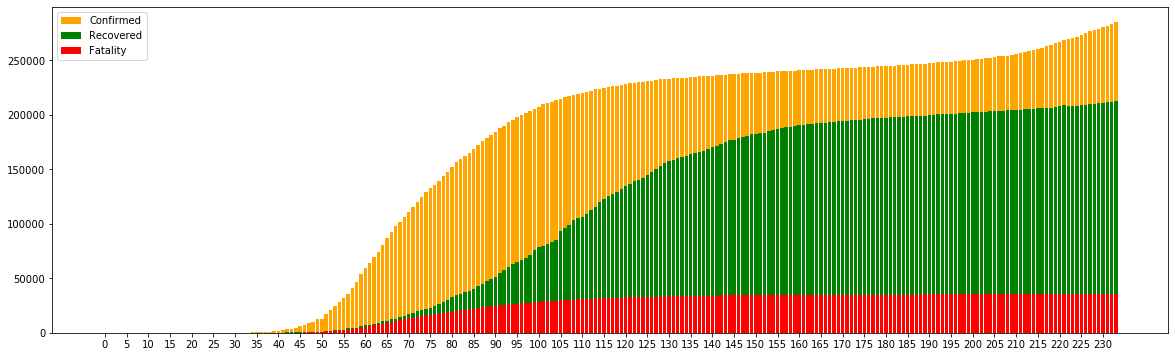

In [27]:
country = 'Italy'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in South Korea

(('Last day Increasing', 136),
 ('Confirmed', 22055),
 ('Recovered', 18029),
 ('Fatalities', 355),
 ('Remaining', 3671))

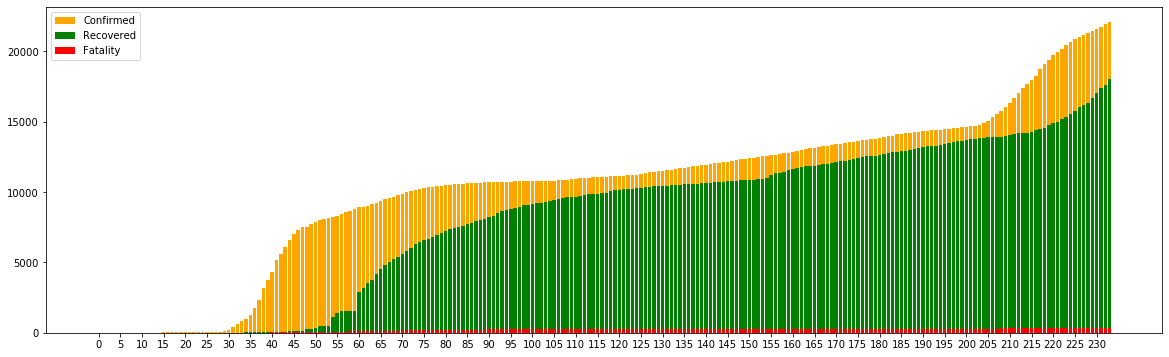

In [25]:
country = 'Korea, South'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Japan

(('Last day Increasing', 642),
 ('Confirmed', 74558),
 ('Recovered', 65244),
 ('Fatalities', 1428),
 ('Remaining', 7886))

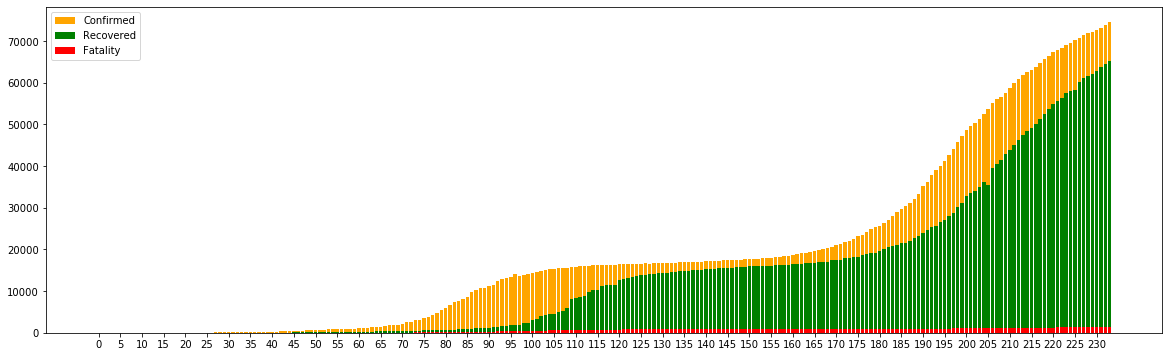

In [23]:
country = 'Japan'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in the USA

(('Last day Increasing', 47192),
 ('Confirmed', 6443743),
 ('Recovered', 2417878),
 ('Fatalities', 192979),
 ('Remaining', 3832886))

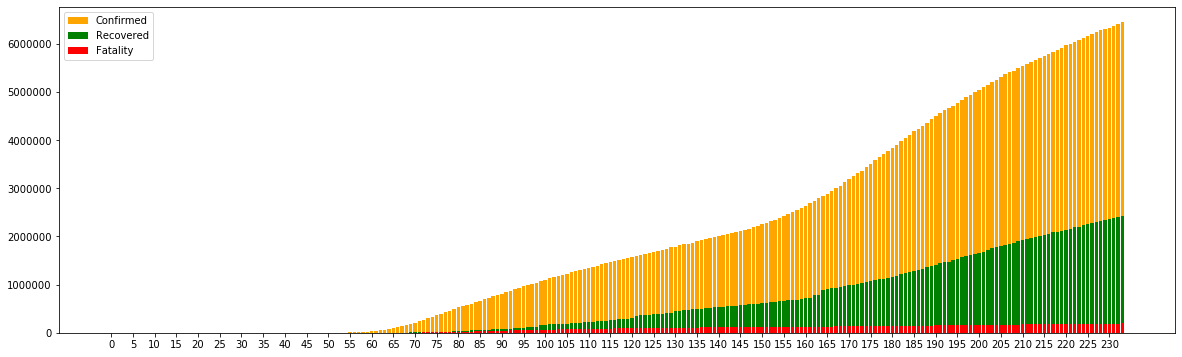

In [22]:
country = 'US'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in the Australia

(('Last day Increasing', 43),
 ('Confirmed', 26607),
 ('Recovered', 23327),
 ('Fatalities', 803),
 ('Remaining', 2477))

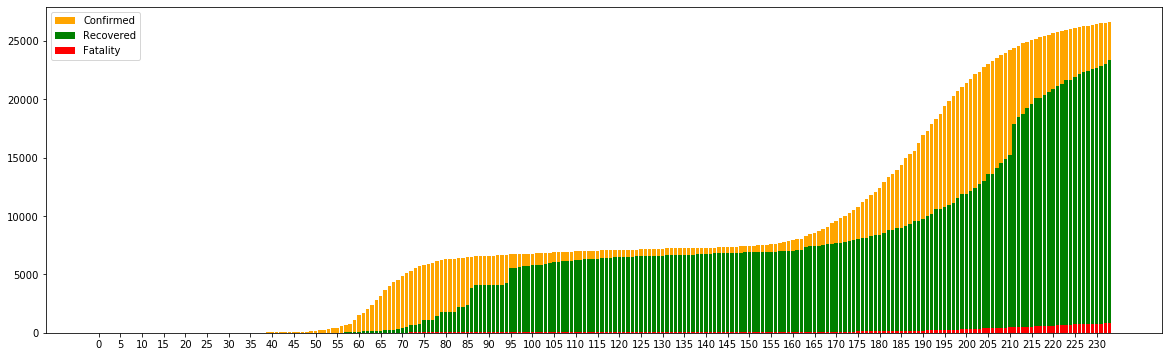

In [18]:
country = 'Australia'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

(('Last day Increasing', 0),
 ('Confirmed', 7088),
 ('Recovered', 6367),
 ('Fatalities', 124),
 ('Remaining', 597))

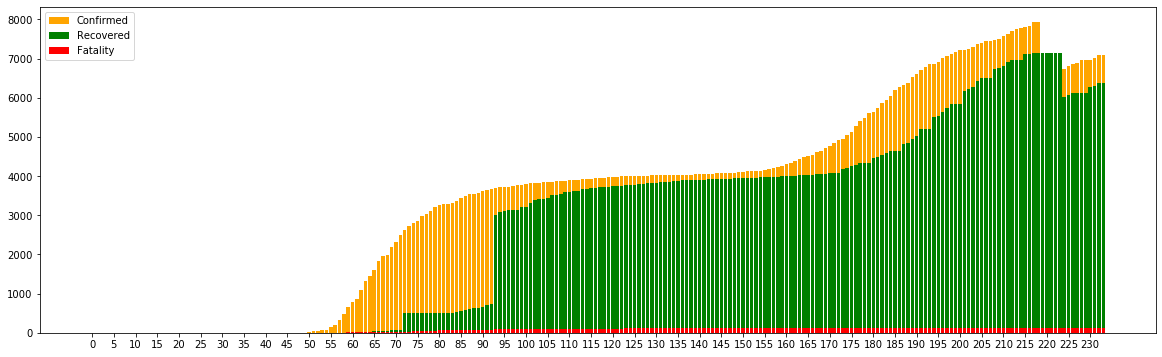

In [21]:
country = 'Luxembourg'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

(('Last day Increasing', 1),
 ('Confirmed', 1060),
 ('Recovered', 902),
 ('Fatalities', 35),
 ('Remaining', 123))

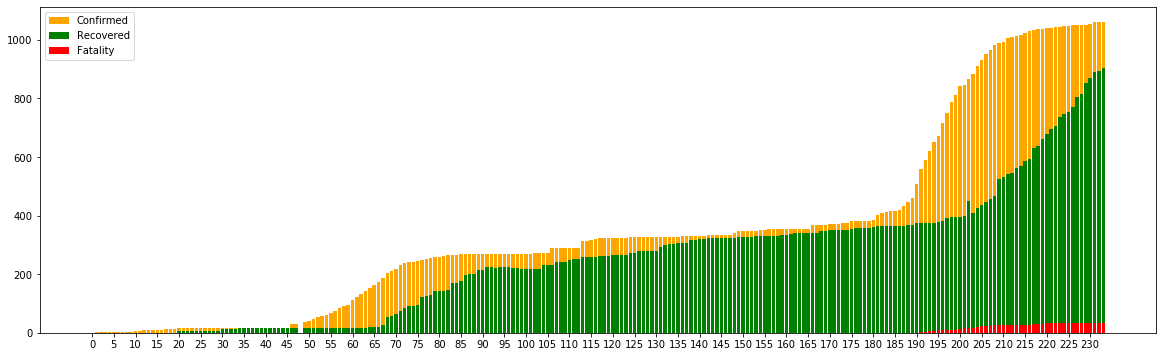

In [20]:
country = 'Vietnam'
plt.xticks(np.arange(0, max(x_dat)+1, 5))
plt.bar(x_dat, y_dat_confirmed[country], color='orange', label='Confirmed')
plt.bar(x_dat, y_dat_recovered[country], color='green', label='Recovered')
plt.bar(x_dat, y_dat_deaths[country], color='red', label='Fatality')
plt.legend()
('Last day Increasing', y_dat_confirmed[country][-1]-y_dat_confirmed[country][-2]), ('Confirmed', y_dat_confirmed[country][-1]), ('Recovered', y_dat_recovered[country][-1]), ('Fatalities', y_dat_deaths[country][-1]), ('Remaining', y_dat_confirmed[country][-1]-y_dat_recovered[country][-1]-y_dat_deaths[country][-1])

### By observing the above information and the charts, there are some highlights
#### - Day 0 (22.01.2020): there were only 8 countries involved, and after 38 days, this number is increasing up to 63 countries (stand: 29.02.2020)
#### - Day 20 (10.02.2020): there was an increasing change in China,
#### - Day 24-25 (15.02.2020): there were increasing changes in Japan, 5 days later (day 30) (20.02.2020) the similar increasing changes in South Korea and in Italy, and 5 days later (day 35) (25.02.2020) in Germany.
